<a href="https://colab.research.google.com/github/upendrak/pyspark_fundamentals/blob/main/PySpark_DataFrame_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

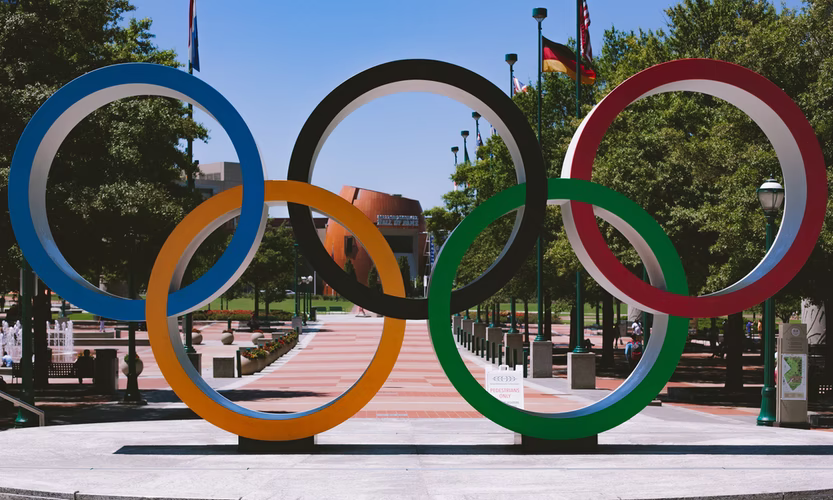

In [1]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 39.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=cd710088aef786297977945d02a6cd5a20a68391594878055da39523f3eab67a
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [3]:
type(spark)

pyspark.sql.session.SparkSession

# Creating DataFrame
A PySpark DataFrame can be created by


1.   From a list of rows
2.   From a Pandas DataFrame
3.   From an RDD consisting of list of tuples



## From a list of rows

In [4]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row

df = spark.createDataFrame([
    Row(a=1, b=2., c='string1', d=date(2000, 1, 1), e=datetime(2000, 1, 1, 12, 0)),
    Row(a=2, b=3., c='string2', d=date(2000, 2, 1), e=datetime(2000, 1, 2, 12, 0)),
    Row(a=4, b=5., c='string3', d=date(2000, 3, 1), e=datetime(2000, 1, 3, 12, 0))
])
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [8]:
# Create a PySpark DataFrame with an explicit schema.
df = spark.createDataFrame([
    (1, 2., 'string1', date(2000, 1, 1), datetime(2000, 1, 1, 12, 0)),
    (2, 3., 'string2', date(2000, 2, 1), datetime(2000, 1, 2, 12, 0)),
    (3, 4., 'string3', date(2000, 3, 1), datetime(2000, 1, 3, 12, 0))
], schema='a long, b double, c string, d date, e timestamp')
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

## From an RDD

In [9]:
rdd = spark.sparkContext.parallelize([
    (1, 2., 'string1', date(2000, 1, 1), datetime(2000, 1, 1, 12, 0)),
    (2, 3., 'string2', date(2000, 2, 1), datetime(2000, 1, 2, 12, 0)),
    (3, 4., 'string3', date(2000, 3, 1), datetime(2000, 1, 3, 12, 0))
])
df = spark.createDataFrame(rdd, schema=['a', 'b', 'c', 'd', 'e'])
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

## From a pandas dataframe

In [13]:
pandas_df = pd.DataFrame([
    (1, 2., 'string1', date(2000, 1, 1), datetime(2000, 1, 1, 12, 0)),
    (2, 3., 'string2', date(2000, 2, 1), datetime(2000, 1, 2, 12, 0)),
    (3, 4., 'string3', date(2000, 3, 1), datetime(2000, 1, 3, 12, 0))
], columns = ["a", "b", "c", "d", "e"])

df = spark.createDataFrame(pandas_df)
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [14]:
# The DataFrames created above all have the same results and schema.
df.printSchema()

root
 |-- a: long (nullable = true)
 |-- b: double (nullable = true)
 |-- c: string (nullable = true)
 |-- d: date (nullable = true)
 |-- e: timestamp (nullable = true)



# Viewing Data

## DataFrame.show()
The top rows of a DataFrame can be displayed using `DataFrame.show()`

In [15]:
df.show(1)

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
+---+---+-------+----------+-------------------+
only showing top 1 row



In [16]:
df.show(1, vertical=True)

-RECORD 0------------------
 a   | 1                   
 b   | 2.0                 
 c   | string1             
 d   | 2000-01-01          
 e   | 2000-01-01 12:00:00 
only showing top 1 row



In [17]:
# You can see the DataFrame’s schema and column names as follows:

df.columns

['a', 'b', 'c', 'd', 'e']

In [18]:
# Show the summary of the DataFrame for a selected columns

df.select("a", "c").describe().show()

+-------+---+-------+
|summary|  a|      c|
+-------+---+-------+
|  count|  3|      3|
|   mean|2.0|   null|
| stddev|1.0|   null|
|    min|  1|string1|
|    max|  3|string3|
+-------+---+-------+

